In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/Users/cbelden/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv("traffic_violaions.csv")

In [7]:
df.columns
df['driver_race'].unique()
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
df =df.drop(['country_name','search_type'],axis=1)

In [9]:
df = df.dropna()

In [10]:
df['driver_race'].value_counts()

White       37196
Black        6552
Hispanic     4074
Asian        1370
Other         148
Name: driver_race, dtype: int64

In [11]:
df_new=df.drop(['stop_date','driver_age_raw','stop_time','violation_raw','drugs_related_stop'],axis=1)
df_new.describe()
#df_orig['driver_race'].value_counts()
#df_orig['driver_gender'].value_counts()
#df_orig['drugs_related_stop'].value_counts()
# df_new.drop(df_new[df_new['driver_race'] >= "Other"].index, inplace = True)
df_new.drop(df_new[df_new['stop_outcome'] == "Arrest Passenger"].index, inplace = True)
df_new.drop(df_new[df_new['stop_outcome'] == "N/D"].index, inplace = True)
df_new.drop(df_new[df_new['stop_outcome'] == "No Action"].index, inplace = True)
df_new.drop(df_new[df_new['driver_race'] == "Other"].index, inplace = True)
df_new.drop(df_new[df_new['driver_age'] > 75].index, inplace = True)

In [12]:
df_new['driver_race'].value_counts()

White       36571
Black        6391
Hispanic     3975
Asian        1353
Name: driver_race, dtype: int64

In [13]:
df_new['age_ranges'] = pd.cut(df_new['driver_age'], [0, 25, 50, 75, 100],labels=False)
df_new  = df_new.drop('driver_age',axis = 1)
df_new['age_ranges'].value_counts()
df_orig = df_new.copy()
for column in df_new.columns: #one hot encode the data
    df_new[column]=LabelEncoder().fit_transform(df_new[column])
df_test = df_new.copy()
df_new

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,age_ranges
0,1,3,4,0,1,0,0,0
1,1,3,4,0,1,0,0,1
2,1,3,4,0,1,0,0,1
3,1,3,2,0,0,1,1,0
4,0,3,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...
52956,1,3,4,0,0,1,0,1
52958,0,2,4,0,1,0,0,1
52959,0,1,4,0,1,0,0,0
52962,1,3,4,0,1,0,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 81400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1105, cost: 74117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1023, cost: 72830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1128, cost: 72229.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1105, cost: 70689.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3779, cost: 66814.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

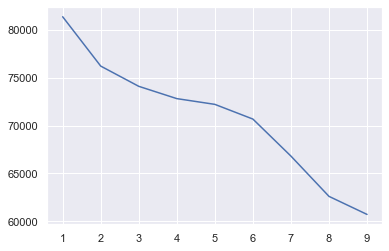

In [14]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters,init ="Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_new)
    cost.append(kmode.cost_)
plt.plot(range(1,10),cost)

In [15]:
# km_final = KModes(n_clusters=2,init="Cao", n_init = 1, verbose=1) 
# fitClusters_cao = km_final.fit_predict(df_new) 
# df_orig['clusters']=fitClusters_cao 
# df_orig
km_final = KModes(n_clusters=8,init="Cao", n_init = 1, verbose=1) 
fitClusters_cao = km_final.fit_predict(df_new) 
df_orig['clusters']=fitClusters_cao 
df_orig

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4841, cost: 62598.0
Run 1, iteration: 2/100, moves: 2754, cost: 62598.0


,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,age_ranges,clusters
0,M,White,Speeding,False,Citation,False,0-15 Min,0,0
1,M,White,Speeding,False,Citation,False,0-15 Min,1,0
2,M,White,Speeding,False,Citation,False,0-15 Min,1,0
3,M,White,Other,False,Arrest Driver,True,16-30 Min,0,3
4,F,White,Speeding,False,Citation,False,0-15 Min,0,0
...,...,...,...,...,...,...,...,...,...
52956,M,White,Speeding,False,Arrest Driver,True,0-15 Min,1,0
52958,F,Hispanic,Speeding,False,Citation,False,0-15 Min,1,0
52959,F,Black,Speeding,False,Citation,False,0-15 Min,0,1
52962,M,White,Speeding,False,Citation,False,0-15 Min,0,0


In [16]:
from sklearn import metrics
# print(metrics.silhouette_score(df_test,fitClusters_cao)) 0.20608505052025036 for k=2
print(metrics.silhouette_score(df_test,fitClusters_cao))

0.15768613486755273


In [17]:
from sklearn.metrics import davies_bouldin_score
#print(davies_bouldin_score(df_test,fitClusters_cao)) 2.4604487271497657 for k =2
print(davies_bouldin_score(df_test,fitClusters_cao))

2.6603232091573914


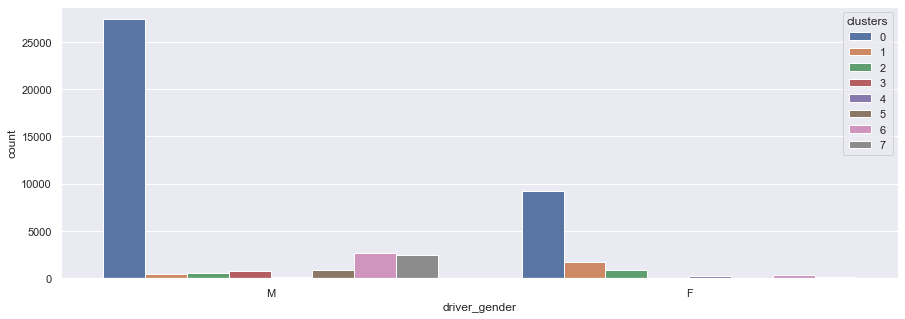

In [18]:
#go through each variable
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['driver_gender'],order=df_orig['driver_gender'].value_counts().index,hue=df_orig['clusters'])
plt.show()

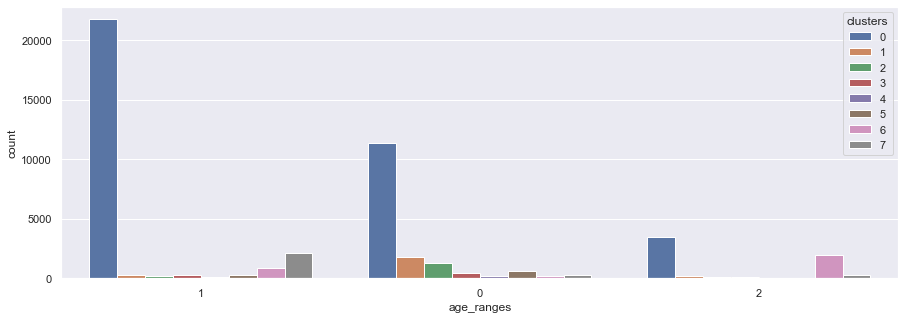

In [19]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['age_ranges'],order=df_orig['age_ranges'].value_counts().index,hue=df_orig['clusters'])
plt.show()

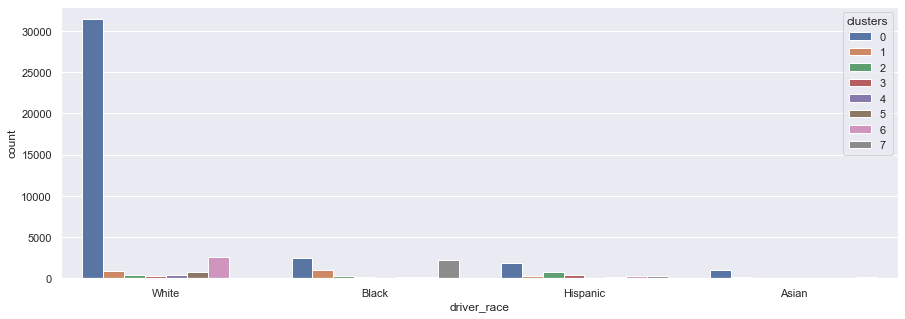

In [20]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['driver_race'],order=df_orig['driver_race'].value_counts().index,hue=df_orig['clusters'])
plt.show()

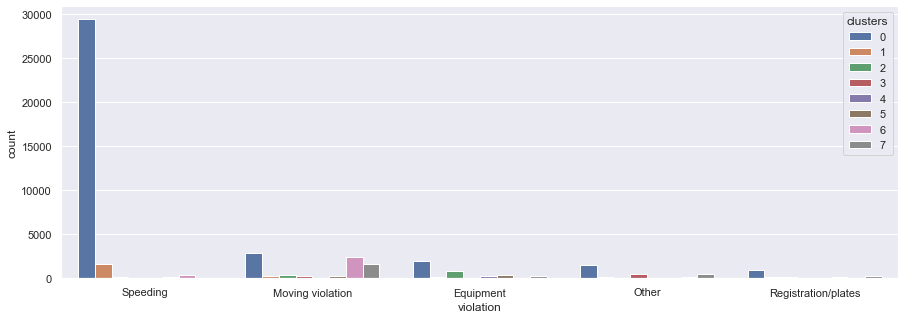

In [21]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['violation'],order=df_orig['violation'].value_counts().index,hue=df_orig['clusters'])
plt.show()

In [22]:
df_orig.columns

Index(['driver_gender', 'driver_race', 'violation', 'search_conducted',
       'stop_outcome', 'is_arrested', 'stop_duration', 'age_ranges',
       'clusters'],
      dtype='object')

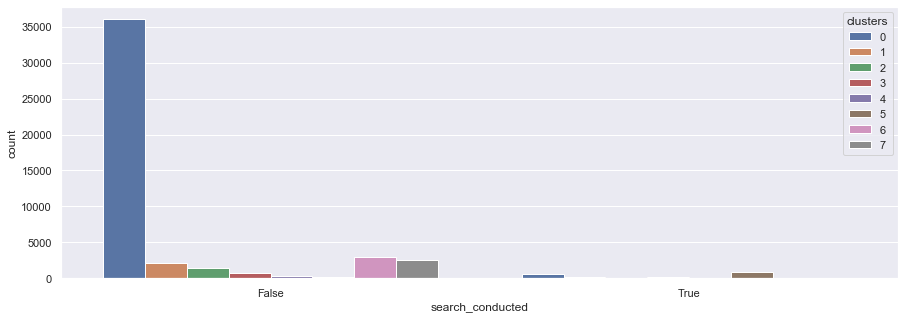

In [23]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['search_conducted'],order=df_orig['search_conducted'].value_counts().index,hue=df_orig['clusters'])
plt.show()

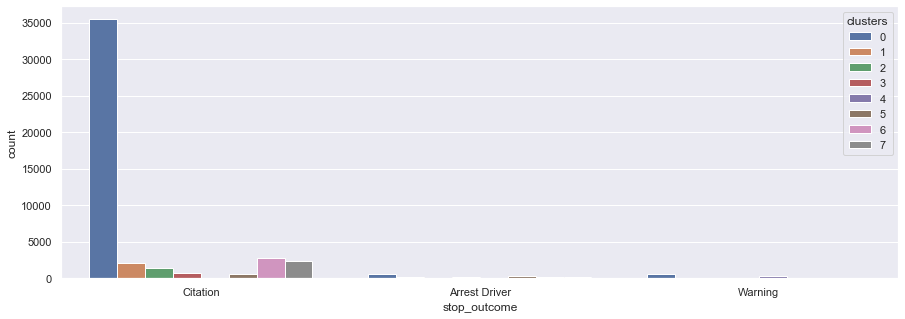

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['stop_outcome'],order=df_orig['stop_outcome'].value_counts().index,hue=df_orig['clusters'])
plt.show()

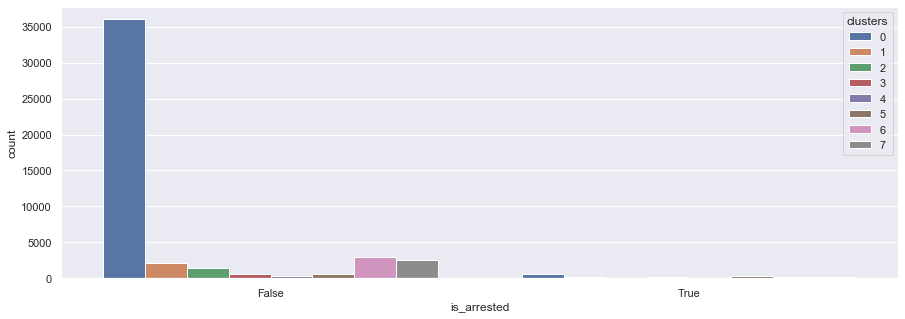

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['is_arrested'],order=df_orig['is_arrested'].value_counts().index,hue=df_orig['clusters'])
plt.show()

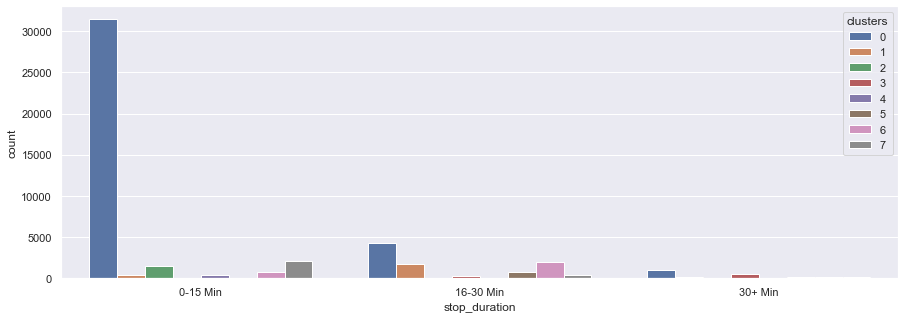

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_orig['stop_duration'],order=df_orig['stop_duration'].value_counts().index,hue=df_orig['clusters'])
plt.show()

In [27]:
df_new
df_cameron_encoded = df_new.copy()
df_cameron_unencoded =df_orig.copy()

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#for finding the silouhette scores...
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from validclust import dunn
from sklearn.metrics import davies_bouldin_score

Creating a umap dimension reduction to perform clustering on to see the improvement...

In [30]:
import umap
reducer = umap.UMAP()
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
std = ss.fit_transform(df_cameron_encoded)
umap_red = reducer.fit_transform(df_cameron_encoded)
umap_red 

array([[ 10.50419  , -10.414553 ],
       [ 20.97655  ,  -3.9310606],
       [ 19.879198 ,  -4.439221 ],
       ...,
       [ -1.2985418, -15.142789 ],
       [ 10.671987 ,  -9.69317  ],
       [  2.7435198,  17.035547 ]], dtype=float32)

In [32]:
len(umap_red)

48290

### DBSCAN Clustering

In [33]:
def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', s =20)
    plt.title("DBSCAN")
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred
    
def dbscan_reg(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred
    

The Silhouette score 0.8085778951644897
The David Bouldin Score....0.2800397185051525


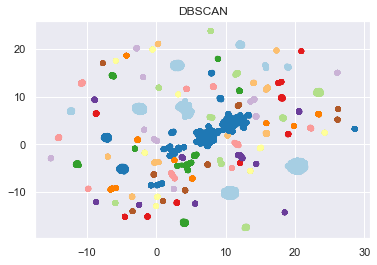

In [34]:
labels_dbscan_umap = dbscan(umap_red, .8, 10)

In [35]:
#dbscan_reg(df_cameron_encoded, .6, 10)
dbscan_reg(df_test, .6, 10)

The Silhouette score 0.9318465432810892
The David Bouldin Score....1.0714312115940778


array([ 0,  1,  1, ..., 71,  0,  2])

### KMEANS Clustering

In [36]:
from sklearn.cluster import KMeans
def Kmeans_tests(X,k):
    km = KMeans(n_clusters = k, random_state=0).fit(X)
    y_pred = km.predict(X)
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    return sil, db
def Kmeans(X, k):
    km = KMeans(n_clusters = k, random_state=0).fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', s =10)
    plt.title("KMeans")
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred, sil, db
    
    
def Kmeans_reg(X, k):
    db = KMeans(n_clusters = k, random_state=0)
    db.fit(X)
    y_pred = db.fit_predict(X)
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred, sil, db

In [37]:
#calculating best k score 
sil_scores = []
db_scores = []
for k in range(7, 16):
    sil, db = Kmeans_tests(umap_red, k)
    sil_scores.append(sil)
    db_scores.append(db)

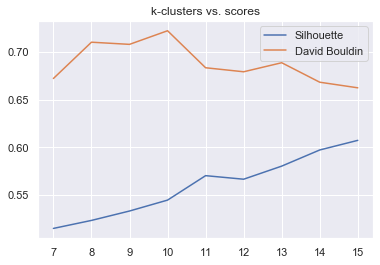

In [38]:
plt.plot(range(7,16), sil_scores, label = "Silhouette")
plt.plot(range(7,16), db_scores, label = "David Bouldin")
plt.legend()
plt.title("k-clusters vs. scores")
plt.show()

As you can see for Kmeans our best option for # of clusters is 10 clusters

The Silhouette score 0.5446670055389404
The David Bouldin Score....0.7224813809776266


(array([4, 0, 0, ..., 3, 4, 9], dtype=int32), 0.544667, 0.7224813809776266)

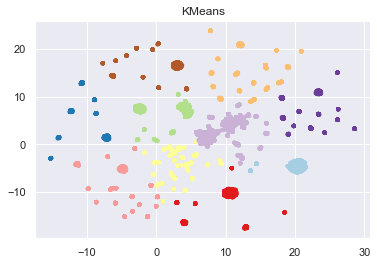

In [39]:
Kmeans(umap_red , 10)

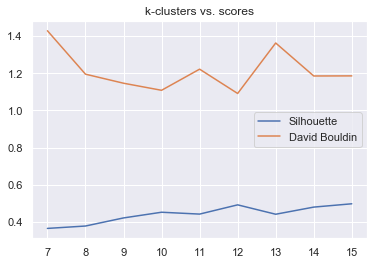

In [40]:
#doing the same with non umap reduced data
sil_scores = []
db_scores = []
for k in range(7, 16):
    sil, db = Kmeans_tests(df_test, k)
    sil_scores.append(sil)
    db_scores.append(db)
    
plt.plot(range(7,16), sil_scores, label = "Silhouette")
plt.plot(range(7,16), db_scores, label = "David Bouldin")
plt.legend()
plt.title("k-clusters vs. scores")
plt.show()

In [41]:
Kmeans_reg(df_test, 12)

The Silhouette score 0.4923282482358399
The David Bouldin Score....1.0911848865602163


(array([8, 5, 5, ..., 4, 8, 2], dtype=int32),
 0.4923282482358399,
 1.0911848865602163)

Kmeans doesnt work well at all on the original data set and shouldn't be considered mainly due to the fact that the data is more categorical than numerical

### Gaussian Mixture Models

In [42]:
from sklearn.mixture import GaussianMixture
def GMM(X, k):
    gm = GaussianMixture(n_components=k, random_state=0).fit(X)
    y_pred = gm.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', s =10)
    plt.title("Gaussian Mixture Model")
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred, sil, db
    
def GMM_reg(X, k):
    gm = GaussianMixture(n_components=k, random_state=0).fit(X)
    y_pred = gm.predict(X)
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    print(f'The Silhouette score {sil}')
    print(f'The David Bouldin Score....{db}')
    return y_pred, sil, db
def GMM_tests(X, k):
    gm = GaussianMixture(n_components=k, random_state=0).fit(X)
    y_pred = gm.predict(X)
    sil = metrics.silhouette_score(X, y_pred)
    db = metrics.davies_bouldin_score(X, y_pred)
    return sil, db

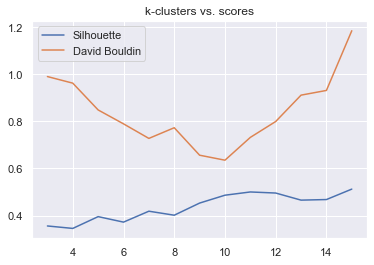

In [43]:
# finding the best k score for GMM umap data set
sil_scores = []
db_scores = []
for k in range(3, 16):
    sil, db = GMM_tests(umap_red, k)
    sil_scores.append(sil)
    db_scores.append(db)
    
plt.plot(range(3,16), sil_scores, label = "Silhouette")
plt.plot(range(3,16), db_scores, label = "David Bouldin")
plt.legend()
plt.title("k-clusters vs. scores")
plt.show()

11 Clusters seems to work best here

The Silhouette score 0.500091016292572
The David Bouldin Score....0.7320398226428645


(array([0, 3, 3, ..., 9, 0, 4]), 0.500091, 0.7320398226428645)

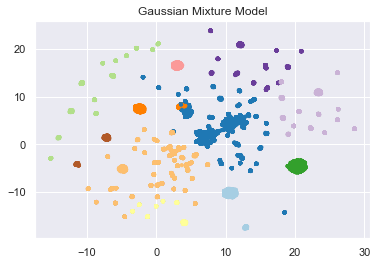

In [44]:
GMM(umap_red, 11)

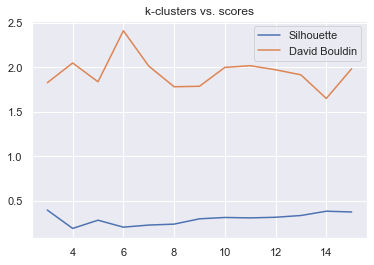

In [45]:
# finding the best k score for GMM with regular data set
sil_scores = []
db_scores = []
for k in range(3, 16):
    sil, db = GMM_tests(df_test, k)
    sil_scores.append(sil)
    db_scores.append(db)
    
plt.plot(range(3,16), sil_scores, label = "Silhouette")
plt.plot(range(3,16), db_scores, label = "David Bouldin")
plt.legend()
plt.title("k-clusters vs. scores")
plt.show()

In [46]:
GMM_reg(df_test, 14)

The Silhouette score 0.38064388399312576
The David Bouldin Score....1.6504660250731178


(array([0, 8, 8, ..., 3, 0, 0]), 0.38064388399312576, 1.6504660250731178)

### Interpreting the clusters under umap dbscan

Because the best clustering scores came from the umap dataset with DBSCAN clustering algorithm this is the clustering that we are going to interpret

In [61]:
# The number of clusters within the clustering
np.unique(labels_dbscan_umap)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [62]:
df_umap = df_orig.copy()
df_umap['clusters'] = labels_dbscan_umap
#finding how many points exist in each cluster
counts = []
for i in range(95):
    counts.append([i, df_umap.loc[df_umap['clusters'] == i].count()[0]])
counts_new = []
for item in counts:
    # we choose clusters with 1000 or more entries to see the difference of the larger clusters, the smaller clusters
    # are too small to consider.
    if item[1] >=1000:
        counts_new.append(item)
counts_new

[[0, 4897],
 [1, 7230],
 [2, 1661],
 [3, 2869],
 [5, 1003],
 [7, 3399],
 [11, 3385],
 [12, 1933],
 [13, 1411],
 [21, 1364]]

In [63]:
#creating 10 separate dataframes to represent each cluster
dfClusterOne = df_umap[df_umap["clusters"] == 0]
dfClusterTwo = df_umap[df_umap["clusters"] == 1]
dfClusterThree = df_umap[df_umap["clusters"] == 2]
dfClusterFour = df_umap[df_umap["clusters"] == 3]
dfClusterFive = df_umap[df_umap["clusters"] == 5]
dfClusterSix = df_umap[df_umap["clusters"] == 7]
dfClusterSeven = df_umap[df_umap["clusters"] == 11]
dfClusterEight = df_umap[df_umap["clusters"] == 12]
dfClusterNine = df_umap[df_umap["clusters"] == 13]
dfClusterTen = df_umap[df_umap["clusters"] == 21]

import_umap = pd.concat([dfClusterOne, dfClusterTwo, dfClusterThree, dfClusterFour, dfClusterFive,
                         dfClusterSix, dfClusterSeven, dfClusterEight, dfClusterNine, dfClusterTen])
import_umap

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,age_ranges,clusters
0,M,White,Speeding,False,Citation,False,0-15 Min,0,0
15,M,White,Speeding,False,Citation,False,0-15 Min,0,0
16,M,White,Speeding,False,Citation,False,0-15 Min,0,0
28,M,White,Speeding,False,Citation,False,0-15 Min,0,0
38,M,White,Speeding,False,Citation,False,0-15 Min,0,0
...,...,...,...,...,...,...,...,...,...
52662,M,White,Speeding,False,Citation,False,16-30 Min,1,21
52700,M,White,Speeding,False,Citation,False,16-30 Min,1,21
52763,M,White,Speeding,False,Citation,False,16-30 Min,1,21
52894,M,White,Speeding,False,Citation,False,16-30 Min,1,21


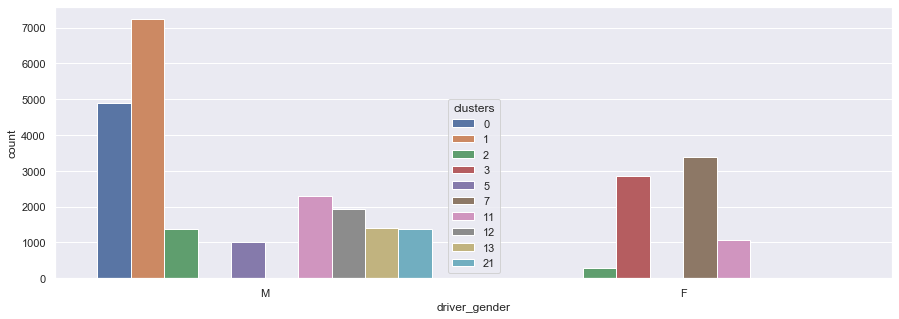

In [64]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['driver_gender'],order=import_umap['driver_gender'].value_counts().index,hue=import_umap['clusters'])
plt.show()

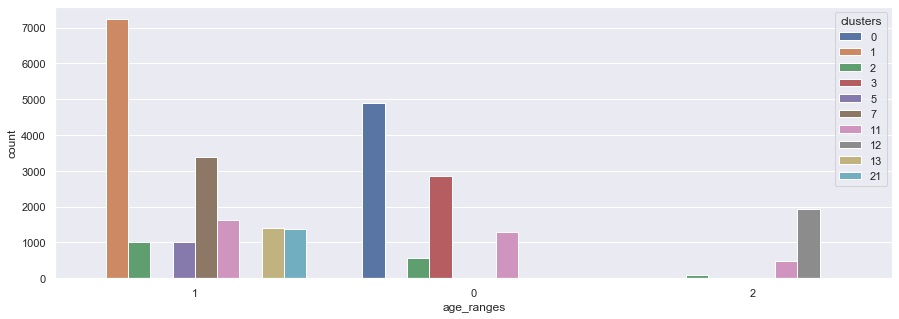

In [65]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['age_ranges'],order=import_umap['age_ranges'].value_counts().index,hue=import_umap['clusters'])
plt.show()

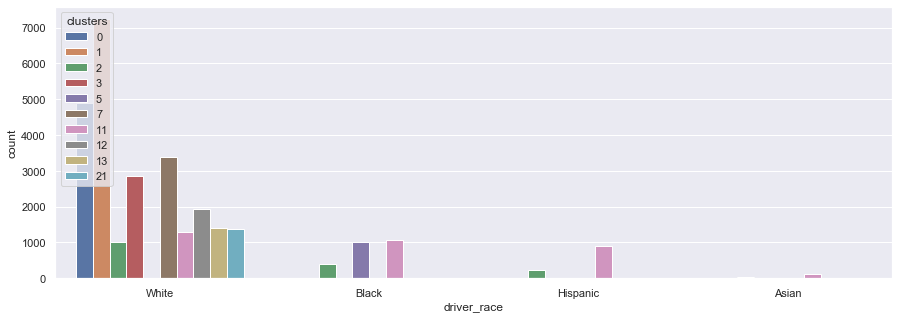

In [66]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['driver_race'],order=import_umap['driver_race'].value_counts().index,hue=import_umap['clusters'])
plt.show()

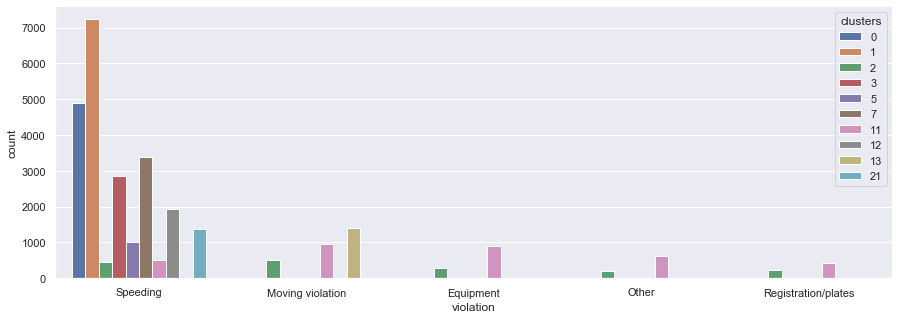

In [67]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['violation'],order=import_umap['violation'].value_counts().index,hue=import_umap['clusters'])
plt.show()

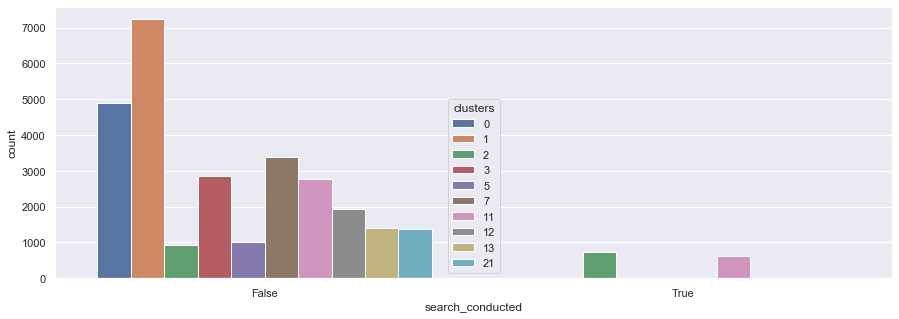

In [68]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['search_conducted'],order=import_umap['search_conducted'].value_counts().index,hue=import_umap['clusters'])
plt.show()

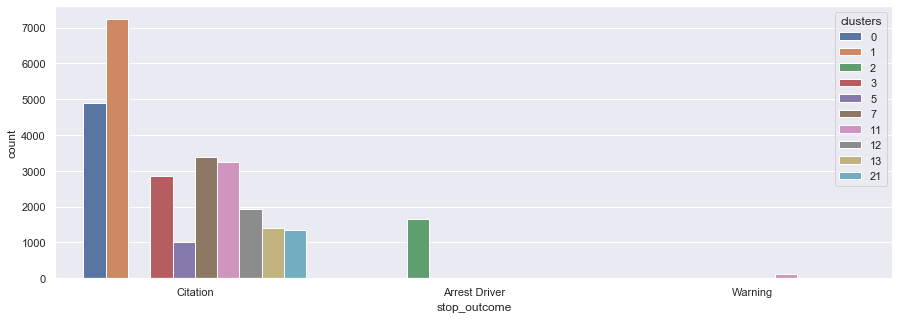

In [69]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['stop_outcome'],order=import_umap['stop_outcome'].value_counts().index,hue=import_umap['clusters'])
plt.show()

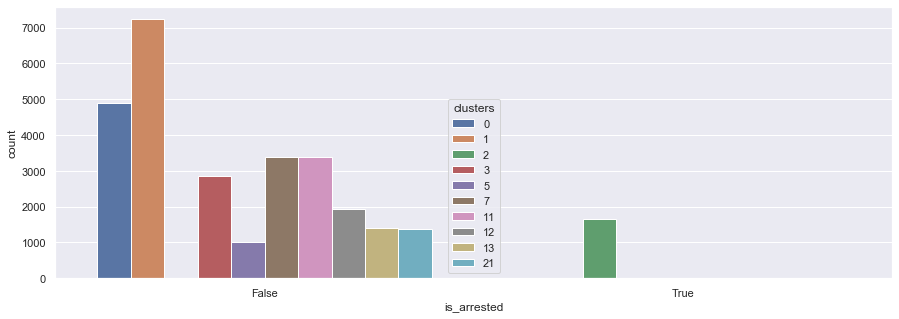

In [70]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['is_arrested'],order=import_umap['is_arrested'].value_counts().index,hue=import_umap['clusters'])
plt.show()

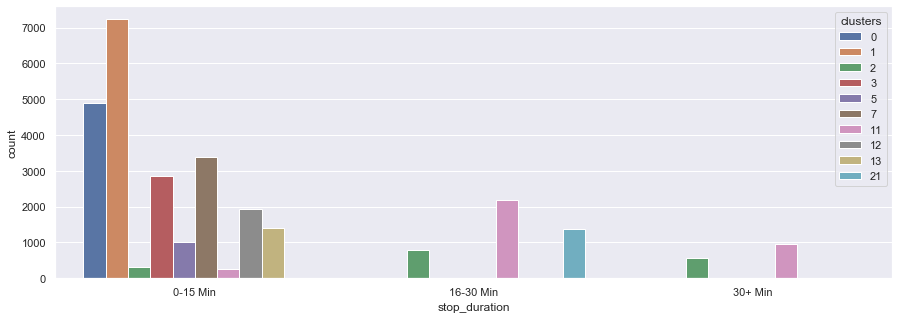

In [71]:
plt.subplots(figsize = (15,5))
sns.countplot(x=import_umap['stop_duration'],order=import_umap['stop_duration'].value_counts().index,hue=import_umap['clusters'])
plt.show()